## HW02: Exploratory Data Analysis (Part 01)

This is Assignment 02 for the course "Introduction to Data Science" at the Faculty of Information Technology, University of Science, Vietnam National University, Ho Chi Minh City.

---

(Latest update: 26/10/2024)

Student Name: Võ Nguyễn Phương Quỳnh

Student ID: 22127360

---

## **How to Complete and Submit the Assignment**

&#9889; **Note**: You should follow the instructions below. If anything is unclear, you need to contact the teaching assistant or instructor immediately for timely support.

**How to Do the Assignment**

You will work directly on this notebook file. First, fill in your full name and student ID (MSSV) in the header section of the file above. In the file, complete the tasks in sections marked:
```python
# YOUR CODE HERE
raise NotImplementedError()
```
Or for optional code sections:
```python
# YOUR CODE HERE (OPTION)
```
For markdown cells, complete the answer in the section marked:
```markdown
YOUR ANSWER HERE
```

**How to Submit the Assignment**

Before submitting, select `Kernel` -> `Restart Kernel & Run All Cells` if you are using a local environment, or `Runtime -> Restart session` and run all if using Google Colab, to ensure everything works as expected.

Next, create a submission folder with the following structure:
- Folder named `MSSV` (for example, if your student ID is `1234567`, name the folder `1234567`)
    - File `HW02.0.ipynb` (no need to submit other files)

Finally, compress this `MSSV` folder in `.zip` format (not `.rar` or any other format) and submit it via the link on Moodle.\
<font color=red>Please make sure to strictly follow this submission guideline.</font>

---

## Import

In [6]:
import requests
import numpy as np
import pandas as pd
from typing import List

import urllib.robotparser

In [7]:
BASE_URL = 'http://api.worldbank.org/v2/'


INDICATOR_CODES = ['SP.POP.TOTL',
                   'SP.POP.TOTL.FE.IN',
                   'SP.POP.TOTL.MA.IN',
                   'SP.DYN.CBRT.IN',
                   'SP.DYN.CDRT.IN',
                   'SE.COM.DURS',
                   'SL.IND.EMPL.ZS',
                   'SL.AGR.EMPL.ZS',
                   'SL.AGR.EMPL.FE.ZS',
                   'SL.IND.EMPL.FE.ZS',
                   'SL.UEM.TOTL.ZS',
                   'NY.GDP.MKTP.CD',
                   'NY.ADJ.NNTY.PC.KD.ZG',
                   'NY.GSR.NFCY.CD',
                   'NV.AGR.TOTL.CD',
                   'EG.USE.ELEC.KH.PC',
                   'EG.FEC.RNEW.ZS',
                   'EG.USE.COMM.FO.ZS',
                   'SP.DYN.LE00.MA.IN',
                   'SP.DYN.LE00.FE.IN',
                   'SE.PRM.ENRR',
                   'SE.TER.ENRR',
                   'SE.PRM.CMPT.ZS',
                   'SE.ADT.1524.LT.ZS']


features_mapping = {
    "SP.POP.TOTL": "Total Population",
    "SP.POP.TOTL.FE.IN": "Female Population",
    "SP.POP.TOTL.MA.IN": "Male Population",
    "SP.DYN.CBRT.IN": "Birth Rate",
    "SP.DYN.CDRT.IN": "Death Rate",
    "SE.COM.DURS": "Compulsory Education Dur.",
    "SL.IND.EMPL.ZS": "Employment in Industry(%)",
    "SL.AGR.EMPL.ZS": "Employment in Agriculture(%)",
    "SL.AGR.EMPL.FE.ZS": "Female Employment in Agriculture(%)",
    "SL.IND.EMPL.FE.ZS": "Female Employment in Industry(%)",
    "SL.UEM.TOTL.ZS": "Unemployment(%)",
    "NY.GDP.MKTP.CD": "GDP in USD",
    "NY.ADJ.NNTY.PC.KD.ZG": "National Income per Capita",
    "NY.GSR.NFCY.CD": "Net income from Abroad",
    "NV.AGR.TOTL.CD": "Agriculture value added(in USD)",
    "EG.USE.ELEC.KH.PC": "Electric Power Consumption(kWH per capita)",
    "EG.FEC.RNEW.ZS": "Renewable Energy Consumption (%)",
    "EG.USE.COMM.FO.ZS": "Fossil Fuel Consumption (%)",
    "SP.DYN.LE00.MA.IN": "Male life expectancy",
    "SP.DYN.LE00.FE.IN": "Female life expectancy ",
    "SE.PRM.ENRR": "School enrollment, primary",
    "SE.TER.ENRR": "School enrollment, tertiary",
    "SE.PRM.CMPT.ZS": "Primary completion rate",
    "SE.ADT.1524.LT.ZS": "Literacy rate"
}

In [8]:
from bs4 import BeautifulSoup
import os

def loadData(country_code: str, format: str = "json", per_page: int = 100, year_interval: str = '2015:2022') -> List:
    # BẠN ĐIỀU CHỈNH LẠI HÀM CRAWL DỮ LIỆU ĐÃ IMPLEMENT Ở HW1
    # YOUR CODE HERE
    start_year, end_year = map(int, year_interval.split(':'))
    years = []
    added = False
    datas = []
    # print(f"Processing {country_code}")
    
    for indication in INDICATOR_CODES:
        url = f"{BASE_URL}country/{country_code}/indicator/{indication}"
        response = requests.get(url)
        soup = BeautifulSoup(response.content, 'lxml')

        datesXML = soup.find_all('wb:date')
        valuesXML = soup.find_all('wb:value')
        
        data = []
        
        for i in range(len(valuesXML)):
            # check if year is in range
            if (int(datesXML[i].get_text()) > end_year or int(datesXML[i].get_text()) < start_year): 
                continue
            
            if valuesXML[i].get_text() == '':
                data.append(None)
            else:
                data.append(float(valuesXML[i].get_text()))
            
            if not added:
                years.append(int(datesXML[i].get_text()))
                
        added = True        
        datas.append(data) 
        
    datas.append(years)

    return datas
    # raise NotImplementedError()

In [9]:
def loadDataCountry(country_code: str, format: str = "json", per_page: int = 100, year_interval: str = '2015:2022', is_display: bool = False) -> pd.DataFrame:
    df_country_code = pd.read_csv("./country-codes.csv")
    df_country_code = df_country_code.fillna("NA")
    COUNTRIES_MAPPING = dict(
        zip(df_country_code["alpha-2-code"], df_country_code["name"]))
    del df_country_code

    col_list = list(features_mapping.values())
    col_list.append('Year')

    print(f"[LOG] Loading data for {COUNTRIES_MAPPING[country_code]}")

    dataLst = loadData(country_code=country_code, format=format,
                       per_page=per_page, year_interval=year_interval)

    df = pd.DataFrame(np.column_stack(dataLst), columns=col_list)

    df['Country'] = COUNTRIES_MAPPING[country_code]

    if is_display:
        from IPython.display import display
        display(df.head())

    return df

In [10]:
def replacer(s, newstring, index, nofail=False):
    if not nofail and index not in range(len(s)):
        raise ValueError("index outside given string")
    if index < 0:  # add it to the beginning
        return newstring + s
    if index > len(s):  # add it to the end
        return s + newstring
    return s[:index] + newstring + s[index + 1:]

In [11]:
def loadDataContinent(continent: str = "Asia", format: str = "json", per_page: int = 100, year_interval: str = '2015:2022', is_display: bool = False) -> pd.DataFrame:
    if continent.lower() not in ['asia', 'europe', 'africa', 'oceania', 'americas']:
        print(
            f"[LOG] Please check input continent again. We don't support {continent}.")
        raise ValueError

    if not continent[0].isupper():
        continent = replacer(continent, continent[0].upper(), 0)

    # Định nghĩa một số country codes
    df_country_code = pd.read_csv("./country-codes.csv")
    df_country_code = df_country_code.fillna("NA")
    df_country_code = df_country_code[df_country_code["continent"] == continent]
    lst_country_codes = df_country_code["alpha-2-code"]
    del df_country_code
    
    df = pd.DataFrame()
    for country_code in lst_country_codes:
        df = pd.concat([df, loadDataCountry(
            country_code=country_code,
            format=format,
            per_page=per_page,
            year_interval=year_interval,
            is_display=False)], axis=0)

    if is_display:
        from IPython.display import display
        display(df.head())

    return df

In [12]:
def saveDataFrame2CSV(df: pd.DataFrame, save_path: str, sep: str = ',', encoding: str = 'utf-8') -> bool:
    try:
        df.to_csv(save_path, sep=sep, encoding=encoding, index=False)
    except:
        raise ModuleNotFoundError
        # return False
    return True

---

## Data collecting

In [13]:
# YOUR CODE HERE
# Just replace your name, and your student ID number
studentName = "Vo Nguyen Phuong Quynh"
studentID = 22127360

In [14]:
format: str = "json"
per_page: int = 100

# TODO: Define your wanted year interval here, highly recommended from 1995 to 2022 or 1985 to 2022
# YOUR CODE HERE
year_interval: str = "1995:2022"

is_display: bool = True

In [15]:
def continentChooser(studentID: int) -> str:
    return str(['asia', 'europe', 'africa', 'americas'][studentID % 4])
    
your_continent:str = continentChooser(studentID=studentID)
your_continent

'asia'

In [16]:
df = loadDataContinent(
    continent = your_continent,
    format = format,
    per_page = per_page,
    year_interval = year_interval,
    is_display = is_display
)

[LOG] Loading data for Afghanistan
[LOG] Loading data for Armenia
[LOG] Loading data for Azerbaijan
[LOG] Loading data for Bahrain
[LOG] Loading data for Bangladesh
[LOG] Loading data for Bhutan
[LOG] Loading data for Brunei Darussalam
[LOG] Loading data for Cambodia
[LOG] Loading data for China
[LOG] Loading data for Cyprus
[LOG] Loading data for Georgia
[LOG] Loading data for India
[LOG] Loading data for Indonesia
[LOG] Loading data for Iran, Islamic Rep.
[LOG] Loading data for Iraq
[LOG] Loading data for Israel
[LOG] Loading data for Japan
[LOG] Loading data for Jordan
[LOG] Loading data for Kazakhstan
[LOG] Loading data for Korea, Dem. People’s Rep.
[LOG] Loading data for Korea, Rep.
[LOG] Loading data for Kuwait
[LOG] Loading data for Kyrgyz Republic
[LOG] Loading data for Lao PDR
[LOG] Loading data for Lebanon
[LOG] Loading data for Malaysia
[LOG] Loading data for Maldives
[LOG] Loading data for Mongolia
[LOG] Loading data for Myanmar
[LOG] Loading data for Nepal
[LOG] Loading da

,Total Population,Female Population,Male Population,Birth Rate,Death Rate,Compulsory Education Dur.,Employment in Industry(%),Employment in Agriculture(%),Female Employment in Agriculture(%),Female Employment in Industry(%),...,Renewable Energy Consumption (%),Fossil Fuel Consumption (%),Male life expectancy,Female life expectancy,"School enrollment, primary","School enrollment, tertiary",Primary completion rate,Literacy rate,Year,Country
0,41128771.0,20362329.0,20766442.0,35.143,6.906,9.0,18.340073,46.58907,47.44943,34.10224,...,20.0,None,59.766,66.213,None,None,None,62.66,2022,Afghanistan
1,40099462.0,19844584.0,20254878.0,35.842,7.344,9.0,18.635343,46.587823,53.199968,27.10318,...,20.0,None,58.915,65.279,None,None,None,56.0,2021,Afghanistan
2,38972230.0,19279930.0,19692301.0,36.051,7.113,9.0,18.481322,45.983408,53.816468,26.435147,...,18.2,None,59.866,65.432,None,10.85844,None,None,2020,Afghanistan
3,37769499.0,18679089.0,19090409.0,36.466,6.791,9.0,18.228116,45.01604,58.815603,25.296527,...,18.9,None,60.619,66.677,110.007507,None,86.175522,None,2019,Afghanistan
4,36686784.0,18136922.0,18549862.0,36.927,6.981,9.0,18.143741,44.4536,63.137495,24.213714,...,18.3,None,59.923,66.458,107.780533,9.96379,88.735519,None,2018,Afghanistan


In [17]:
# Save raw data to disk
save_name = "_".join([str(studentID), str(your_continent)]) + ".csv"
saveDataFrame2CSV(df, os.path.join("./", save_name))

True

## Exploring your data

### Read raw data from file (0.25 points)

First, declare `raw_df` to store your data when read with Pandas.

In [18]:
# YOUR CODE HERE
raw_df = pd.read_csv(save_name)

#raise NotImplementedError()

In [19]:
# TEST
raw_df.head()

,Total Population,Female Population,Male Population,Birth Rate,Death Rate,Compulsory Education Dur.,Employment in Industry(%),Employment in Agriculture(%),Female Employment in Agriculture(%),Female Employment in Industry(%),...,Renewable Energy Consumption (%),Fossil Fuel Consumption (%),Male life expectancy,Female life expectancy,"School enrollment, primary","School enrollment, tertiary",Primary completion rate,Literacy rate,Year,Country
0,41128771.0,20362329.0,20766442.0,35.143,6.906,9.0,18.340073,46.589070,47.449430,34.102240,...,20.0,NaN,59.766,66.213,NaN,NaN,NaN,62.66,2022,Afghanistan
1,40099462.0,19844584.0,20254878.0,35.842,7.344,9.0,18.635343,46.587823,53.199968,27.103180,...,20.0,NaN,58.915,65.279,NaN,NaN,NaN,56.00,2021,Afghanistan
2,38972230.0,19279930.0,19692301.0,36.051,7.113,9.0,18.481322,45.983408,53.816468,26.435147,...,18.2,NaN,59.866,65.432,NaN,10.85844,NaN,NaN,2020,Afghanistan
3,37769499.0,18679089.0,19090409.0,36.466,6.791,9.0,18.228116,45.016040,58.815603,25.296527,...,18.9,NaN,60.619,66.677,110.007507,NaN,86.175522,NaN,2019,Afghanistan
4,36686784.0,18136922.0,18549862.0,36.927,6.981,9.0,18.143741,44.453600,63.137495,24.213714,...,18.3,NaN,59.923,66.458,107.780533,9.96379,88.735519,NaN,2018,Afghanistan


### How many rows and how many columns does the raw data have? (0.25 points)

Next, you calculate the number of rows and columns of the DataFrame `raw_df` and store it in the variable `shape` (tuple). **If your data has the number of rows smaller than 1000, please crawl the data once again with larger year interval**.

In [20]:
# YOUR CODE HERE
shape = raw_df.shape
#raise NotImplementedError()

In [21]:
# TEST
print(f"Current shape: {shape}")

if shape[0] > 1000:
    print(f"Your data good!.")
else:
    print(f"Your raw data absolutely small. Please choose larger year interval.!")

Current shape: (1316, 26)
Your data good!.


### What does each line mean? Does it matter if the lines have different meanings?

YOUR ANSWER HERE

### Does the raw data have duplicate rows? (0.25 points)

Next, you calculate the number of rows with duplicate indexes and store it in the variable `num_duplicated_rows`. In a group of lines with the same index, the first line is not counted as repeated.

In [22]:
# YOUR CODE HERE
index = raw_df.index
detectDupSeries = index.duplicated(keep='first')
num_duplicated_rows = detectDupSeries.sum()
# raise NotImplementedError()

In [23]:
# TEST
if num_duplicated_rows == 0:
    print(f"Your raw data have no duplicated line.!")
else:
    if num_duplicated_rows > 1:
        ext = "lines"
    else:
        ext = "line"
    print(f"Your raw data have {num_duplicated_rows} duplicated " + ext + ". Please de-deduplicate your raw data.!")

Your raw data have no duplicated line.!


### What does each column mean? (0.25đ)

To see the meaning of each column:
- First, you need to read the file "assignment_schema.csv" into DataFrame `col_meaning_df`; you also need to make the "Query API" column an index column.
- Then, you just need to display the DataFrame `col_meaning_df` for viewing. You can use `pd.set_option` to customize the table width so that strings that are too long are not truncated.

In [24]:
# YOUR CODE HERE
col_meaning_df = pd.read_csv('assignment_schema.csv')
col_meaning_df.set_index('Query API', inplace=True)
pd.set_option('display.max_colwidth', 350)
# raise NotImplementedError()

In [25]:
# TEST
col_meaning_df

,Meaning
Query API,
SP.POP.TOTL,Total Population
SP.POP.TOTL.FE.IN,Female Population
SP.POP.TOTL.MA.IN,Male Population
SP.DYN.CBRT.IN,Birth Rate
SP.DYN.CDRT.IN,Death Rate
SE.COM.DURS,Compulsory Education Dur
SL.IND.EMPL.ZS,Employment in Industry(%)
SL.AGR.EMPL.ZS,Employment in Agriculture(%)
SL.AGR.EMPL.FE.ZS,Female Employment in Agriculture(%)


Before moving forward, you should read the results displayed above and make sure you understand the meaning of the columns. To understand the meaning of the column, you may need to look at the values of the DataFrame side column `raw_df`.

### What data type does each column currently have? Are there any columns whose data types are not suitable for further processing? (0.25 points)

Next, you calculate the data type (dtype) of each column in DataFrame `raw_df` and save the result into Series `dtypes` (This Series has the index as the column name).

In [26]:
# YOUR CODE HERE
dtypes = raw_df.dtypes
# raise NotImplementedError()

In [27]:
# TEST
dtypes

Total Population                              float64
Female Population                             float64
Male Population                               float64
Birth Rate                                    float64
Death Rate                                    float64
Compulsory Education Dur.                     float64
Employment in Industry(%)                     float64
Employment in Agriculture(%)                  float64
Female Employment in Agriculture(%)           float64
Female Employment in Industry(%)              float64
Unemployment(%)                               float64
GDP in USD                                    float64
National Income per Capita                    float64
Net income from Abroad                        float64
Agriculture value added(in USD)               float64
Electric Power Consumption(kWH per capita)    float64
Renewable Energy Consumption (%)              float64
Fossil Fuel Consumption (%)                   float64
Male life expectancy        

We observe that the column `Year` has numeric type. However, its magnitude does not have a significance. And, it actually represents a period instead of a number. Thus, it can be convert to categorical type.

In [28]:
# YOUR CODE HERE
# turn year type to categorical
raw_df['Year'] = raw_df['Year'].astype(str)

# raise NotImplementedError()

In [29]:
raw_df.dtypes

Total Population                              float64
Female Population                             float64
Male Population                               float64
Birth Rate                                    float64
Death Rate                                    float64
Compulsory Education Dur.                     float64
Employment in Industry(%)                     float64
Employment in Agriculture(%)                  float64
Female Employment in Agriculture(%)           float64
Female Employment in Industry(%)              float64
Unemployment(%)                               float64
GDP in USD                                    float64
National Income per Capita                    float64
Net income from Abroad                        float64
Agriculture value added(in USD)               float64
Electric Power Consumption(kWH per capita)    float64
Renewable Energy Consumption (%)              float64
Fossil Fuel Consumption (%)                   float64
Male life expectancy        

In [30]:
# TEST
# dtypes = raw_df.dtypes
# float_cols = set(dtypes[(dtypes==np.float32) | (dtypes==np.float64)].index)
# assert len(float_cols) == 24
# cate_cols, object_cols = set(dtypes[dtypes == pd.Categorical].index), set(dtypes[dtypes == object].index)
# assert (len(cate_cols) == 2 and len(object_cols) == 2)

In [31]:
dtypes

Total Population                              float64
Female Population                             float64
Male Population                               float64
Birth Rate                                    float64
Death Rate                                    float64
Compulsory Education Dur.                     float64
Employment in Industry(%)                     float64
Employment in Agriculture(%)                  float64
Female Employment in Agriculture(%)           float64
Female Employment in Industry(%)              float64
Unemployment(%)                               float64
GDP in USD                                    float64
National Income per Capita                    float64
Net income from Abroad                        float64
Agriculture value added(in USD)               float64
Electric Power Consumption(kWH per capita)    float64
Renewable Energy Consumption (%)              float64
Fossil Fuel Consumption (%)                   float64
Male life expectancy        

### For each column with numeric data type, how are the values distributed? (1đ)

For columns with numeric data types, you will calculate:
- Percentage (from 0 to 100) of missing values
- The min
- The lower quartile
- The median
- The upper quartile
- The max

You will save the results to a DataFrame `num_col_info_df`, where:
- The names of the columns are the names of the numeric columns in `raw_df`
- Names of rows: "missing_ratio", "min", "lower_quartile", "median", "upper_quartile", "max"  

For ease of viewing, you round all values to 1 decimal place using the `.round(1)` method.

In [32]:
# YOUR CODE HERE
num_col_info_df = raw_df.select_dtypes(include='float64')

def missing_ratio(df):
    return (df.isnull().mean() * 100).round(1)

def min(df):
    return df.min().round(1)

def lower_quartile(df):
    return df.quantile(0.25).round(1)

def median(df):
    return df.median().round(1)

def upper_quartile(df):
    return df.quantile(0.75).round(1)

def max(df):
    return df.max().round(1)

num_col_info_df = num_col_info_df.agg([missing_ratio, min, lower_quartile, median, upper_quartile, max])
num_col_info_df
# raise NotImplementedError()

,Total Population,Female Population,Male Population,Birth Rate,Death Rate,Compulsory Education Dur.,Employment in Industry(%),Employment in Agriculture(%),Female Employment in Agriculture(%),Female Employment in Industry(%),...,Agriculture value added(in USD),Electric Power Consumption(kWH per capita),Renewable Energy Consumption (%),Fossil Fuel Consumption (%),Male life expectancy,Female life expectancy,"School enrollment, primary","School enrollment, tertiary",Primary completion rate,Literacy rate
missing_ratio,0.000000e+00,0.0,0.0,0.0,0.0,20.4,0.0,0.0,0.0,0.0,...,6.600000e+00,34.3,3.3,38.5,0.0,0.0,19.8,27.8,39.7,77.8
min,2.582080e+05,124951.0,133257.0,4.9,0.8,5.0,3.5,0.1,0.0,1.7,...,4.972527e+07,13.2,0.0,0.0,51.0,54.1,22.2,0.2,17.9,35.8
lower_quartile,4.382818e+06,2121473.0,2311564.5,14.9,4.8,8.0,15.9,6.2,3.3,7.4,...,8.468652e+08,723.3,1.0,63.6,64.6,70.2,96.6,15.0,90.2,95.0
median,1.822701e+07,9013541.5,9061772.5,19.7,6.2,9.0,21.4,28.8,29.9,12.0,...,3.638505e+09,1814.5,5.4,90.1,68.6,74.8,100.8,29.5,96.5,98.8
upper_quartile,6.135766e+07,30517285.0,30801407.8,24.5,7.5,10.0,26.1,46.5,54.7,16.6,...,2.032138e+10,5101.6,35.0,98.2,73.4,78.5,106.5,46.9,100.2,100.0
max,1.417173e+09,691528501.0,731180498.0,52.1,16.7,15.0,59.6,85.4,89.5,40.2,...,1.309261e+12,21230.1,94.4,100.0,81.6,87.7,150.4,127.6,134.5,100.0


In [33]:
# TEST
assert num_col_info_df["Total Population"]["missing_ratio"] == 0

In [34]:
dict(num_col_info_df.iloc[0])

{'Total Population': 0.0,
 'Female Population': 0.0,
 'Male Population': 0.0,
 'Birth Rate': 0.0,
 'Death Rate': 0.0,
 'Compulsory Education Dur.': 20.4,
 'Employment in Industry(%)': 0.0,
 'Employment in Agriculture(%)': 0.0,
 'Female Employment in Agriculture(%)': 0.0,
 'Female Employment in Industry(%)': 0.0,
 'Unemployment(%)': 0.0,
 'GDP in USD': 2.9,
 'National Income per Capita': 43.5,
 'Net income from Abroad': 6.1,
 'Agriculture value added(in USD)': 6.6,
 'Electric Power Consumption(kWH per capita)': 34.3,
 'Renewable Energy Consumption (%)': 3.3,
 'Fossil Fuel Consumption (%)': 38.5,
 'Male life expectancy': 0.0,
 'Female life expectancy ': 0.0,
 'School enrollment, primary': 19.8,
 'School enrollment, tertiary': 27.8,
 'Primary completion rate': 39.7,
 'Literacy rate': 77.8}

After identifying the basic statistical numbers that describe your data, we further need to determine the features that have a large number of missing values. Such features are not useful for the analysis stage and must be removed from the dataset.

Depending on your goals, the threshold for "large" can be defined. Usually, if the percentage of missing values is greater than 75%, the column is dropped from the dataframe and an updated dataframe is returned.

In [35]:
def drop_missing_features(df: pd.DataFrame, missing_lst: dict = dict(num_col_info_df.iloc[0]), threshold: float = 75.0) -> pd.DataFrame:
    # YOUR CODE HERE
    if (df is None) or (missing_lst is None) or (threshold is None):
        print(f"[LOG] Invalid.")
        raise ValueError
    
    # make a copy to avoid changing the original dataframe
    df2 = df.copy()
    
    drop_lst = [col for col in missing_lst if missing_lst[col] > threshold]
    print(f"[LOG] Dropping columns {drop_lst} with missing ratio > {threshold}%")
    df2 = df2.drop(columns=drop_lst)
    return df2
    # raise NotImplementedError()

raw_df = drop_missing_features(raw_df, dict(num_col_info_df.iloc[0]))

[LOG] Dropping columns ['Literacy rate'] with missing ratio > 75.0%


In [36]:
# TEST
raw_df.head()

,Total Population,Female Population,Male Population,Birth Rate,Death Rate,Compulsory Education Dur.,Employment in Industry(%),Employment in Agriculture(%),Female Employment in Agriculture(%),Female Employment in Industry(%),...,Electric Power Consumption(kWH per capita),Renewable Energy Consumption (%),Fossil Fuel Consumption (%),Male life expectancy,Female life expectancy,"School enrollment, primary","School enrollment, tertiary",Primary completion rate,Year,Country
0,41128771.0,20362329.0,20766442.0,35.143,6.906,9.0,18.340073,46.589070,47.449430,34.102240,...,NaN,20.0,NaN,59.766,66.213,NaN,NaN,NaN,2022,Afghanistan
1,40099462.0,19844584.0,20254878.0,35.842,7.344,9.0,18.635343,46.587823,53.199968,27.103180,...,NaN,20.0,NaN,58.915,65.279,NaN,NaN,NaN,2021,Afghanistan
2,38972230.0,19279930.0,19692301.0,36.051,7.113,9.0,18.481322,45.983408,53.816468,26.435147,...,NaN,18.2,NaN,59.866,65.432,NaN,10.85844,NaN,2020,Afghanistan
3,37769499.0,18679089.0,19090409.0,36.466,6.791,9.0,18.228116,45.016040,58.815603,25.296527,...,NaN,18.9,NaN,60.619,66.677,110.007507,NaN,86.175522,2019,Afghanistan
4,36686784.0,18136922.0,18549862.0,36.927,6.981,9.0,18.143741,44.453600,63.137495,24.213714,...,NaN,18.3,NaN,59.923,66.458,107.780533,9.96379,88.735519,2018,Afghanistan


After remove features which have large missing values, our dataframe still have missing values. So that, we need to fill these missing values so that they can be used in analysis.

In [37]:
def filling_missing_value(df: pd.DataFrame) -> pd.DataFrame:
    # YOUR CODE HERE
    if df is None:
        print(f"[LOG] Invalid.")
        raise ValueError
    
    df2 = df.copy()
    
    cols = list(df2.columns)
    
    cols.remove('Country')
    cols.remove('Year')
    
    df2.fillna(value=np.nan, inplace=True)
    
    for col in cols:
        df2[col].fillna(df2[col].mean(), inplace=True)
    
    return df2
    # raise NotImplementedError()

raw_df = filling_missing_value(df=raw_df)

In [38]:
# TEST
raw_df.head()

,Total Population,Female Population,Male Population,Birth Rate,Death Rate,Compulsory Education Dur.,Employment in Industry(%),Employment in Agriculture(%),Female Employment in Agriculture(%),Female Employment in Industry(%),...,Electric Power Consumption(kWH per capita),Renewable Energy Consumption (%),Fossil Fuel Consumption (%),Male life expectancy,Female life expectancy,"School enrollment, primary","School enrollment, tertiary",Primary completion rate,Year,Country
0,41128771.0,20362329.0,20766442.0,35.143,6.906,9.0,18.340073,46.589070,47.449430,34.102240,...,3671.569694,20.0,78.362752,59.766,66.213,101.404345,33.940073,93.213150,2022,Afghanistan
1,40099462.0,19844584.0,20254878.0,35.842,7.344,9.0,18.635343,46.587823,53.199968,27.103180,...,3671.569694,20.0,78.362752,58.915,65.279,101.404345,33.940073,93.213150,2021,Afghanistan
2,38972230.0,19279930.0,19692301.0,36.051,7.113,9.0,18.481322,45.983408,53.816468,26.435147,...,3671.569694,18.2,78.362752,59.866,65.432,101.404345,10.858440,93.213150,2020,Afghanistan
3,37769499.0,18679089.0,19090409.0,36.466,6.791,9.0,18.228116,45.016040,58.815603,25.296527,...,3671.569694,18.9,78.362752,60.619,66.677,110.007507,33.940073,86.175522,2019,Afghanistan
4,36686784.0,18136922.0,18549862.0,36.927,6.981,9.0,18.143741,44.453600,63.137495,24.213714,...,3671.569694,18.3,78.362752,59.923,66.458,107.780533,9.963790,88.735519,2018,Afghanistan


In [39]:
# TEST
raw_df.select_dtypes(exclude='object').agg([missing_ratio, "min", lower_quartile, median, upper_quartile, "max"])

,Total Population,Female Population,Male Population,Birth Rate,Death Rate,Compulsory Education Dur.,Employment in Industry(%),Employment in Agriculture(%),Female Employment in Agriculture(%),Female Employment in Industry(%),...,Net income from Abroad,Agriculture value added(in USD),Electric Power Consumption(kWH per capita),Renewable Energy Consumption (%),Fossil Fuel Consumption (%),Male life expectancy,Female life expectancy,"School enrollment, primary","School enrollment, tertiary",Primary completion rate
missing_ratio,0.000000e+00,0.0,0.0,0.000,0.000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000,0.0,0.0,0.000,0.000,0.000000,0.000000,0.000000
min,2.582080e+05,124951.0,133257.0,4.900,0.795,5.0,3.519332,0.107774,0.007768,1.735595,...,-1.241468e+11,4.972527e+07,13.187383,0.0,0.0,51.039,54.087,22.162991,0.212900,17.885321
lower_quartile,4.382818e+06,2121473.0,2311564.5,14.900,4.800,8.9,15.900000,6.200000,3.300000,7.400000,...,-2.489910e+09,9.689829e+08,1377.700000,1.1,78.4,64.600,70.200,97.500000,19.700000,93.200000
median,1.822701e+07,9013541.5,9061772.5,19.700,6.200,9.0,21.400000,28.800000,29.900000,12.000000,...,-2.673123e+08,4.664678e+09,3671.600000,6.2,78.4,68.600,74.800,101.400000,33.900000,93.200000
upper_quartile,6.135766e+07,30517285.0,30801407.8,24.500,7.500,9.0,26.100000,46.500000,54.700000,16.600000,...,2.086197e+08,2.867883e+10,3671.600000,33.9,95.3,73.400,78.500,104.800000,40.500000,97.900000
max,1.417173e+09,691528501.0,731180498.0,52.073,16.700,15.0,59.579079,85.412927,89.461880,40.201544,...,2.586995e+11,1.309261e+12,21230.075563,94.4,100.0,81.560,87.710,150.354240,127.577972,134.545609


### For each column with a non-numeric data type, how are the values distributed?(1đ)

For columns with non-numeric data types, you calculate:
- Percentage (from 0 to 100) of missing values
- Number of values (the values here are different values and we do not consider missing values): with columns whose type is categorical, it is a set with a finite number of categories. Directly counting the number of values in these columns doesn't make much sense, so it's better to count the number of elements of all types. (Số lượng các giá trị (các giá trị ở đây là các giá trị khác nhau và ta không xét giá trị thiếu): với cột mà có kiểu là categorical, nó là một tập hợp có số lượng hữu hạn các loại. Việc đếm trực tiếp số lượng các giá trị trong những cột này không có nhiều ý nghĩa, nên tốt hơn hết là mà sẽ đếm số lượng phần tử các loại.)
- The percentage (from 0 to 100) of each value is sorted by decreasing percentage (we do not consider missing values, the ratio is the ratio compared to the number of non-missing values): you use a dictionary to store , key is the value, value is the percentage; With the column corresponding to each type, the method is similar to above.

You will save the results to DataFrame `cat_col_info_df`, where:
- The names of the columns are the names of the non-numeric columns in `raw_df`
- The names of the lines are: "missing_ratio", "num_values", "value_ratios"

For ease of viewing, you round all values to 1 decimal place using the `.round(1)` method.

Hint: you might want to use it [`explode` method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.explode.html).

In [40]:
pd.set_option('display.max_colwidth', 100) # For clearly
pd.set_option('display.max_columns', None) # For clearly

In [41]:
# YOUR CODE HERE
cat_col_info_df = raw_df.select_dtypes(include='object')

def missing_ratio(df):
    return (df.isna().mean() * 100).round(1)

def num_values(df):
    df = df.str.split(',').explode()
    return len(df.value_counts())

def value_ratios(df):
    df = df.str.split(',').explode()
    totalCount = (~df.isna()).sum()
    return ((df.value_counts()/totalCount*100).round(1)).to_dict()

value_ratios(cat_col_info_df['Country'])

cat_col_info_df = cat_col_info_df.agg([missing_ratio, num_values, value_ratios])

# raise NotImplementedError()

In [42]:
# TEST
cat_col_info_df

,Year,Country
missing_ratio,0.0,0.0
num_values,28,49
value_ratios,"{'2022': 3.6, '2021': 3.6, '1996': 3.6, '1997': 3.6, '1998': 3.6, '1999': 3.6, '2000': 3.6, '200...","{' Rep.': 3.9, 'Korea': 3.9, 'Afghanistan': 2.0, 'Russian Federation': 2.0, 'Maldives': 2.0, 'Mo..."


### Is the collected data reasonable? (0.5 points)

We have a question whether the collected data is reasonable or not? For example, is `Total Population` equal to the sum of `Female Population` and `Male Population`?

In [43]:
def checking_population(df: pd.DataFrame) -> bool:
    # YOUR CODE HERE
    return df["Total Population"].equals((df["Female Population"] + df["Male Population"]))
    # raise NotImplementedError()

In [44]:
# TEST
checking_population(raw_df) == True

False

If the test result is false, we want to see how large with this different? If it is true, please skip this step.

In [45]:
sum(raw_df["Total Population"] - (raw_df["Female Population"] + raw_df["Male Population"]))

-17.0

Let's replace column `Female Population` with the result of difference of `Total Population` and `Male Population` or otherwise.

In [46]:
# YOUR CODE HERE
raw_df["Female Population"] = raw_df["Total Population"] - raw_df["Male Population"]
# raise NotImplementedError()

In [47]:
# TEST
checking_population(raw_df) == True

True

**Can you check more cases for the reasonable of raw data?**

In [48]:
# YOUR CODE HERE (Optional)

In [49]:
### Save your processed data (0.25 points)

In [50]:
print(f"Total number of features: {raw_df.shape[1]}")
raw_df.dtypes

Total number of features: 25


Total Population                              float64
Female Population                             float64
Male Population                               float64
Birth Rate                                    float64
Death Rate                                    float64
Compulsory Education Dur.                     float64
Employment in Industry(%)                     float64
Employment in Agriculture(%)                  float64
Female Employment in Agriculture(%)           float64
Female Employment in Industry(%)              float64
Unemployment(%)                               float64
GDP in USD                                    float64
National Income per Capita                    float64
Net income from Abroad                        float64
Agriculture value added(in USD)               float64
Electric Power Consumption(kWH per capita)    float64
Renewable Energy Consumption (%)              float64
Fossil Fuel Consumption (%)                   float64
Male life expectancy        

In [51]:
# You can set the saved name in a pattern like, studentID_<your continent>_processed.csv
# YOUR CODE HERE
# Save raw data to disk
save_name2 = "_".join([str(studentID), str(your_continent)]) + "_processed.csv"
saveDataFrame2CSV(raw_df, os.path.join("./", save_name2))
# raise NotImplementedError()

True

## Exploring your data (Cont)

### Read cleaned data from file (0.25 points)

We can now use the cleaned dataset for analysis. Thus, we first read the CSV files we created in the previous pre-processing task.

In [52]:
# YOUR CODE HERE
cleaned_df = pd.read_csv(save_name2) 
# raise NotImplementedError()

In [53]:
# TEST
cleaned_df.head()

,Total Population,Female Population,Male Population,Birth Rate,Death Rate,Compulsory Education Dur.,Employment in Industry(%),Employment in Agriculture(%),Female Employment in Agriculture(%),Female Employment in Industry(%),Unemployment(%),GDP in USD,National Income per Capita,Net income from Abroad,Agriculture value added(in USD),Electric Power Consumption(kWH per capita),Renewable Energy Consumption (%),Fossil Fuel Consumption (%),Male life expectancy,Female life expectancy,"School enrollment, primary","School enrollment, tertiary",Primary completion rate,Year,Country
0,41128771.0,20362329.0,20766442.0,35.143,6.906,9.0,18.340073,46.589070,47.449430,34.102240,14.100,1.450216e+10,1.407000,4.306088e+07,4.887435e+09,3671.569694,20.0,78.362752,59.766,66.213,101.404345,33.940073,93.213150,2022,Afghanistan
1,40099462.0,19844584.0,20254878.0,35.842,7.344,9.0,18.635343,46.587823,53.199968,27.103180,11.934,1.426650e+10,-22.902651,8.613293e+07,4.793204e+09,3671.569694,20.0,78.362752,58.915,65.279,101.404345,33.940073,93.213150,2021,Afghanistan
2,38972230.0,19279929.0,19692301.0,36.051,7.113,9.0,18.481322,45.983408,53.816468,26.435147,11.710,1.995593e+10,1.407000,1.492277e+08,5.981906e+09,3671.569694,18.2,78.362752,59.866,65.432,101.404345,10.858440,93.213150,2020,Afghanistan
3,37769499.0,18679090.0,19090409.0,36.466,6.791,9.0,18.228116,45.016040,58.815603,25.296527,11.224,1.879944e+10,1.407000,2.812175e+08,4.845363e+09,3671.569694,18.9,78.362752,60.619,66.677,110.007507,33.940073,86.175522,2019,Afghanistan
4,36686784.0,18136922.0,18549862.0,36.927,6.981,9.0,18.143741,44.453600,63.137495,24.213714,11.206,1.805322e+10,1.407000,2.412913e+08,3.979453e+09,3671.569694,18.3,78.362752,59.923,66.458,107.780533,9.963790,88.735519,2018,Afghanistan


### Describe the correlation between features in the dataset (0.75 points)

Considering the available features within the training dataset, we want to identify and analyse the relationships between them, and then determine which features within the dataset significantly contribute to our solution goal. By using calculation and visualisation, Python allows us to create a correlation matrix, which is a table that represents the correlation coefficients between different variables.

Now let's make a correlation matrix, then visualize it, and describe what insights you observed?

In [54]:
# PRE-PROCESSING IF NEEDED
# YOUR CODE HERE (OPTION) 

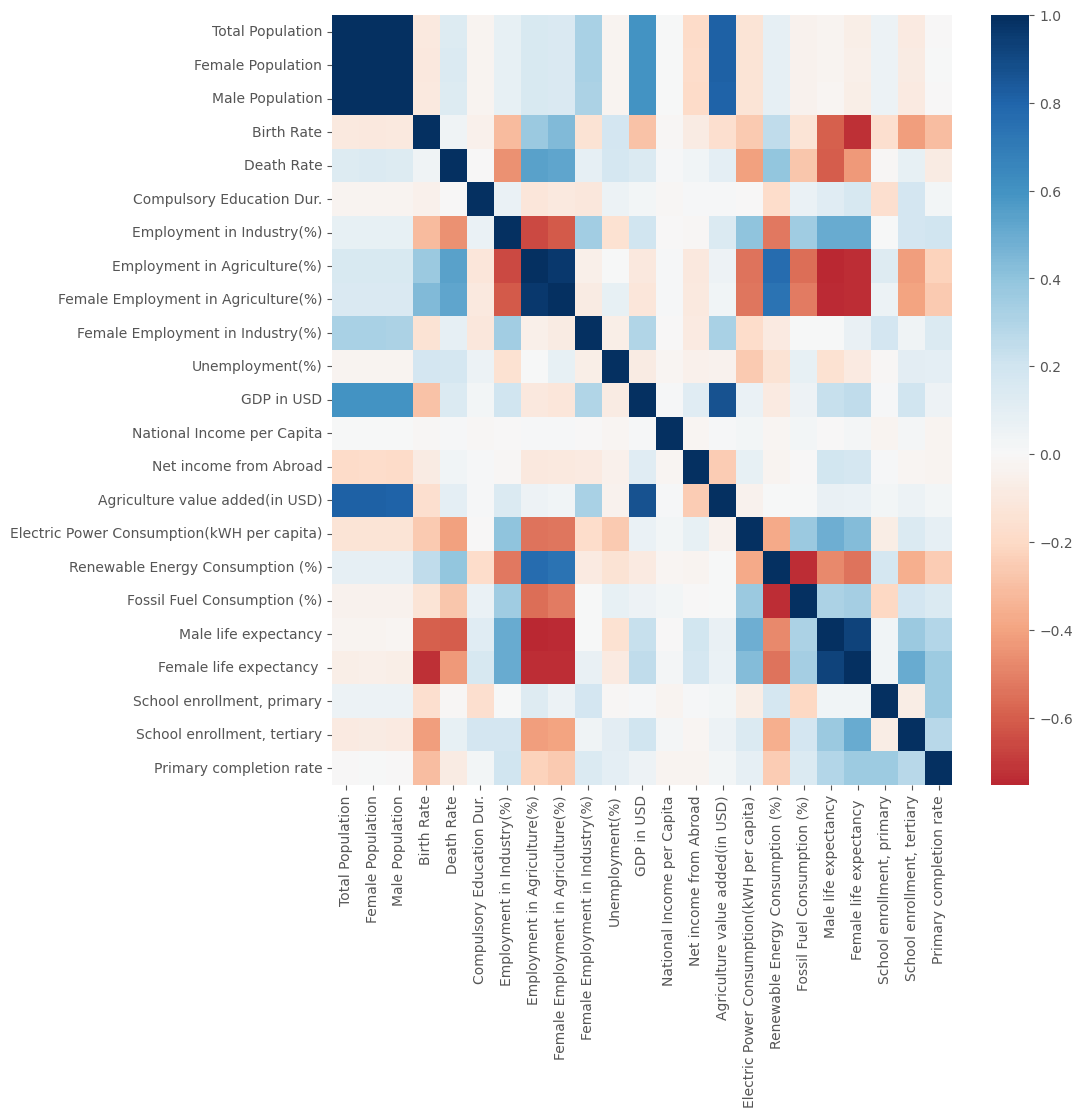

In [55]:
# YOUR CODE HERE
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

df2 = cleaned_df.copy()

# Exclude the categorical features from the matrix
df2.drop(['Year', 'Country'], inplace=True, axis='columns')

# plot a correlation matrix
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df2.corr(), cmap='RdBu', center=0,ax=ax)
plt.show()
# raise NotImplementedError()

**Question 01**: How does the correlation between features change in the top 10 countries with the LARGEST population?

When we have an answer for this question, we might see how features interaction with each other when the conutry population is large.

In [56]:
# PRE-PROCESSING IF NEEDED
# YOUR CODE HERE (OPTION)

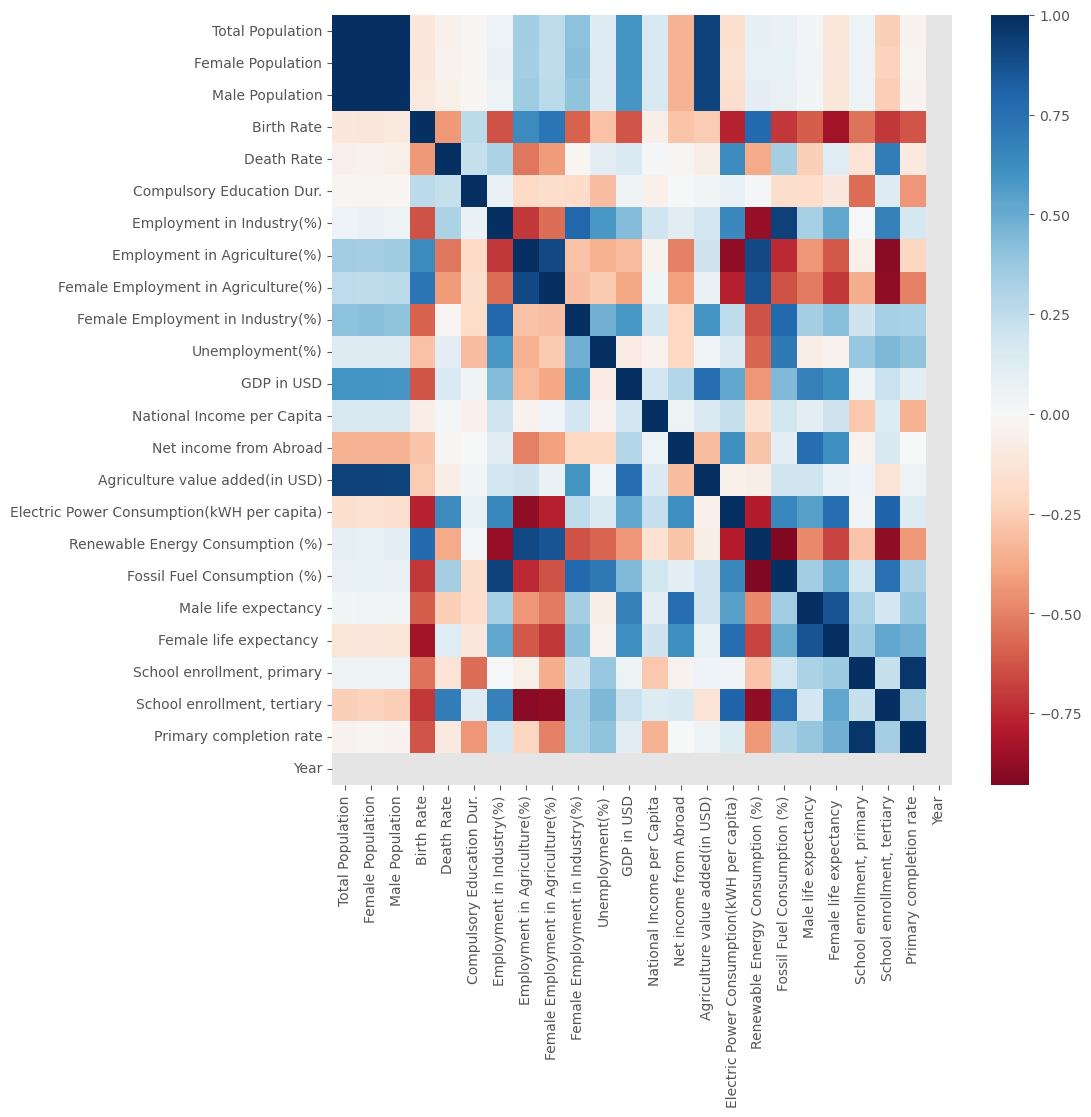

In [57]:
# YOUR CODE HERE
df2 = cleaned_df.copy()

top_countries_largest = df2.groupby("Country").mean('Total Population').sort_values("Total Population", ascending = False).head(10)
top_countries_largest.reset_index(drop = True, inplace =True)
top_countries_largest.drop(['Year'], axis = 'columns')

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(top_countries_largest.corr(), cmap='RdBu', center=0,ax=ax)
plt.show()
# raise NotImplementedError()

Đối với top 10 quốc gia có dân số lớn nhất, ta thấy rằng mức độ tương quan của các giá trị tăng lên (cả tương quan nghịch và tương quan thuận):
- Điển hình như tương quan giữa thuộc tính "Total popuation" so với "Agriculture value added(in USD)" sẽ tương quan thuận mạnh hơn so với ban đầu do quy mô dân số ảnh hưởng đến khả năng nông nghiệp.
- Giữa 2 thuộc tính "Electric Power Consumption" và "Employment in Agriculture" có sự thay đổi từ tương quan nghịch yếu chuyển sang tương quan nghịch mạnh do càng nhiều người làm nông nghiệp thì càng ít tiêu thụ điện. 
=> Nhìn chung các sự tương quan có tính tăng lên về cường độ so với xét trên toàn bộ tập dữ liệu. 

=> Ta có thể lượt bỏ bớt các thuộc tính tương quan mạnh với thuộc tính khác mà không làm ảnh hưởng đến các phân tích và mô hình sau này bỏi lẽ nếu 2 thuộc tính tương quan mạnh với nhau có nghĩa là ta có thể suy ra được giá trị của thuộc tính này nhờ thuộc tính kia và giữ lại cả 2 thuộc tính có thể làm lãng phí và dư thừa.

**Question 02**: How does the correlation between features change in the top 10 countries with the SMALLEST population?

When we have an answer for this question, we might see how features interaction with each other when the conutry population is small.


In [58]:
# PRE-PROCESSING IF NEEDED
# YOUR CODE HERE (OPTION) 

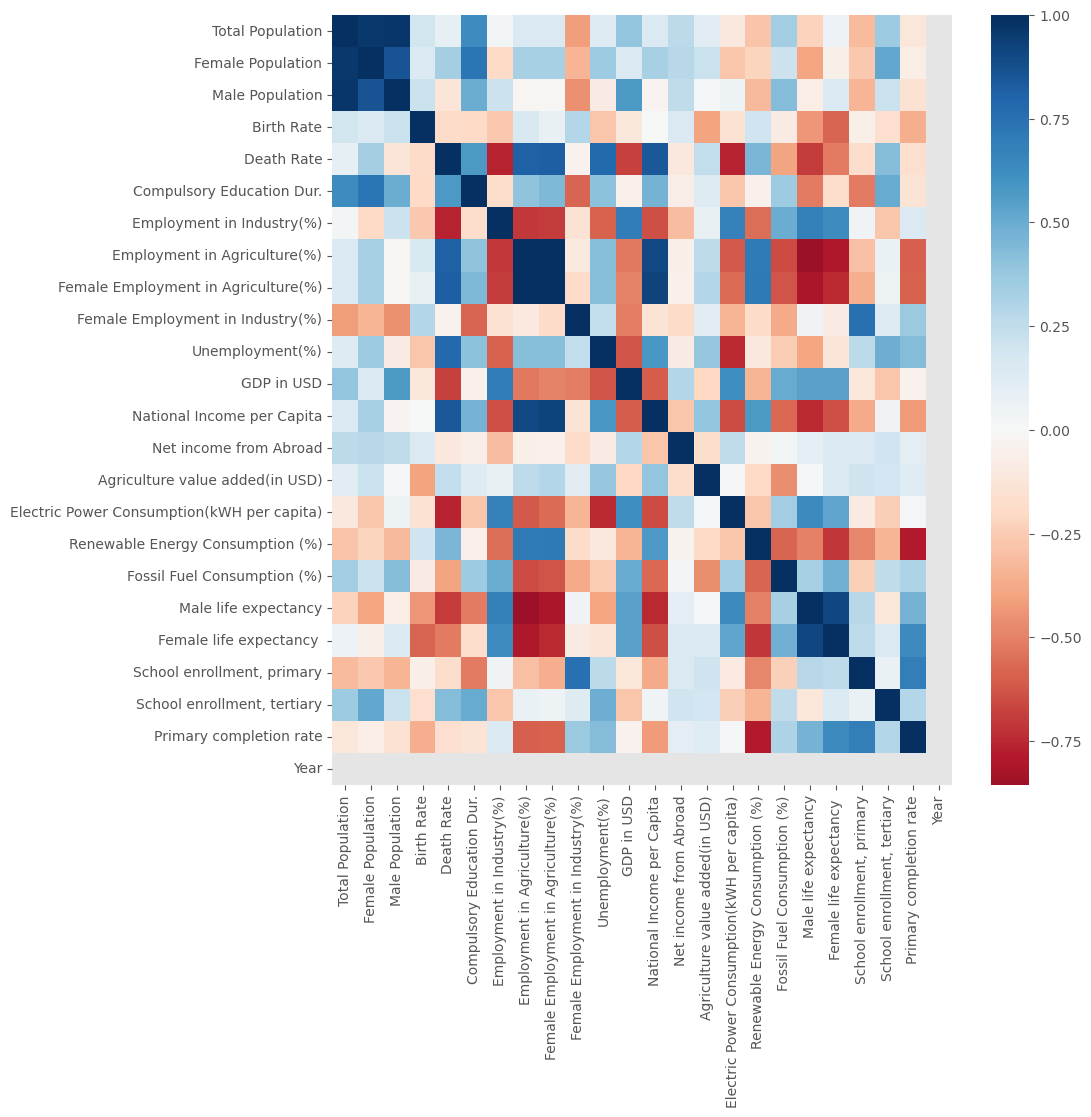

In [59]:
# YOUR CODE HERE
top_countries_smallest = df2.groupby("Country").mean('Total Population').sort_values("Total Population", ascending = True).head(10)
top_countries_smallest.reset_index(drop = True, inplace =True)
top_countries_smallest.drop(['Year'], axis = 'columns')

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(top_countries_smallest.corr(), cmap='RdBu', center=0,ax=ax)
plt.show()


Đối với top 10 quốc gia có dân số nhỏ nhất, ta vẫn thấy rằng mức độ tương quan của các giá trị tăng lên rất nhiều (cả tương quan nghịch và tương quan thuận), một số tương quan thuận yếu ở whole dataset lại trở thành quan hệ tương quan nghịch và ngược lại:
- Thay đổi thuận nghịch: "Total population" vs "Female employment in industry": tương quan thuận giờ thành tương quan nghịch. Ngược lại với "Total imployment in industry" và "Net income from Abroad".
- Có một số thay đổi trong độ tương quan giữa 3 thuộc tính "Total population", "Male population" và "Female population".

=> Nhìn chung, ở các quốc gia nhỏ, các yếu tố kinh tế, dân số và năng lượng có xu hướng tương quan chặt chẽ hơn, có thể do cấu trúc kinh tế và xã hội của các quốc gia này bị ảnh hưởng mạnh bởi các biến động nhỏ.

=> Ta có thể lượt bỏ bớt các thuộc tính tương quan mạnh với thuộc tính khác mà không làm ảnh hưởng đến các phân tích và mô hình sau này bỏi lẽ nếu 2 thuộc tính tương quan mạnh với nhau có nghĩa là ta có thể suy ra được giá trị của thuộc tính này nhờ thuộc tính kia và giữ lại cả 2 thuộc tính có thể làm lãng phí và dư thừa.

## Making a question? (1.25 points)

After exploring the data, we have a better understanding of the data. Now let's see what questions can be answered with this data.

**A possible question is:** What is the population situation of the countries on the continent today?

**Answering this question will** help us to see the current population status and predictions about the future development of the labor force of the countries on the continent are under consideration.

**How we answer this question**: we will consider the Average Birth Rate and Death Rate for countries across all the year.

### Pre-processing

In [60]:
# YOUR CODE HERE (OPTION) 

### Analyzing to get the answer

Step 01: construct Average Birth Rate dataframe for each country.

In [61]:
# Create a new dataframe
avg_birthrate_df = pd.DataFrame()

# YOUR CODE HERE
avg_birthrate_df["Avg.Birth Rate"] = cleaned_df.groupby("Country")["Birth Rate"].mean()
avg_birthrate_df["Country"] = avg_birthrate_df.index
avg_birthrate_df.reset_index(drop=True, inplace=True)
avg_birthrate_df.sort_values("Avg.Birth Rate", inplace=True, ascending=False)
avg_birthrate_df.head()
# raise NotImplementedError()

,Avg.Birth Rate,Country
0,43.117429,Afghanistan
46,36.661679,"Yemen, Rep."
14,33.262393,Iraq
31,32.491929,Pakistan
39,30.419643,Tajikistan


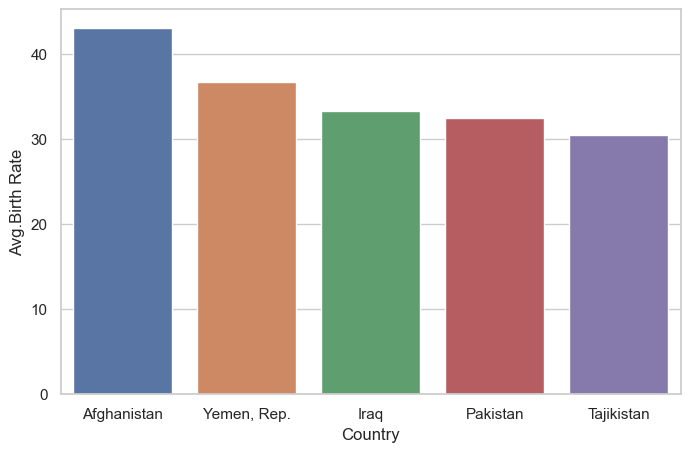

In [62]:
# Plotting for top countries
# YOUR CODE HERE
plt.figure(figsize=(8,5))
sns.set(style="whitegrid")
ax = sns.barplot(data=avg_birthrate_df.head(), x="Country", y= "Avg.Birth Rate")
#  raise NotImplementedError()

Step 02: construct Average Death Rate dataframe for each country.

In [63]:
# Create a new dataframe
avg_deathrate_df = pd.DataFrame()

# YOUR CODE HERE
avg_deathrate_df["Avg.Death Rate"] = cleaned_df.groupby("Country")["Death Rate"].mean()
avg_deathrate_df["Country"] = avg_deathrate_df.index
avg_deathrate_df.reset_index(drop=True, inplace=True)
avg_deathrate_df.sort_values("Avg.Death Rate", inplace=True, ascending=False)
avg_deathrate_df.head()
# raise NotImplementedError()

,Avg.Death Rate,Country
34,14.260714,Russian Federation
10,12.191393,Georgia
28,9.522429,Myanmar
0,9.458214,Afghanistan
1,9.379393,Armenia


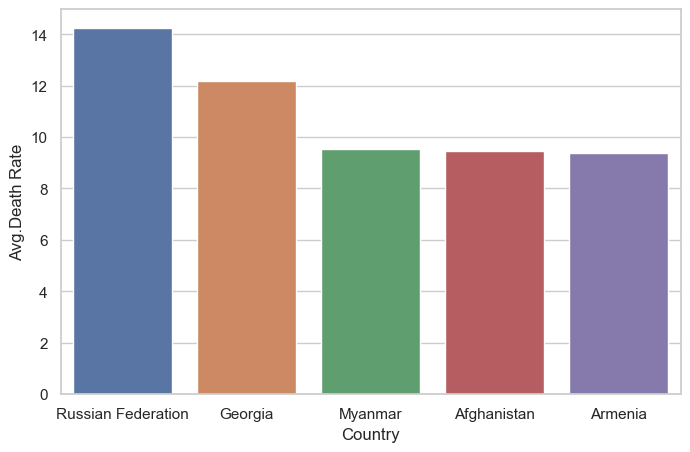

In [64]:
# Plotting for top countries
# YOUR CODE HERE
plt.figure(figsize=(8,5))
sns.set(style="whitegrid")
ax = sns.barplot(data=avg_deathrate_df.head(), x="Country", y= "Avg.Death Rate")
# raise NotImplementedError()

- Tỉ lệ sinh trung bình (Average Birth Rate): Tỉ lệ sinh cao cho thấy dân số trẻ và khả năng phát triển lực lượng lao động mạnh mẽ trong tương lai.
- Tỉ lệ tử trung bình (Average Death Rate): Tỉ lệ tử cao có thể phản ánh tình trạng sức khỏe hoặc các vấn đề khác, ảnh hưởng đến quy mô lực lượng lao động.

=> Nhận thấy: Đa số các quốc gia có tỷ lệ sinh cao hơn lệ tử rất nhiều: dân số có xu hướng tăng, dẫn đến tăng trưởng lực lượng lao động trong tương lai. 

## Making your own question 01? (2 points)

- Câu hỏi: Tình hình phân bổ giới tính ở các nước như thế nào?
- Trả lời câu hỏi này có thể giúp chúng ta hiểu rõ hơn về tình hình cân bằng giới tính hiện nay và đưa ra dự đoán về tương lai.
- Để trả lời câu hỏi này ta sẽ tập trung phân tích vào tỉ lệ nam/nữ ở các nước và đối chiếu với tuổi thọ của từng giới.

### Pre-processing

In [65]:
# YOUR CODE HERE (OPTION) 

### Analyzing to get the answer

In [66]:
# YOUR CODE HERE
avg_male_df = pd.DataFrame()

avg_male_df["Avg.Male Population"] = cleaned_df.groupby("Country")["Male Population"].mean()

avg_male_df["Country"] = avg_male_df.index
avg_male_df.reset_index(drop=True, inplace=True)
avg_male_df.sort_values("Avg.Male Population", inplace=True, ascending=False)

avg_male_df.head()

,Avg.Male Population,Country
8,6.778810e+08,China
11,6.242091e+08,India
12,1.203047e+08,Indonesia
31,9.553869e+07,Pakistan
4,7.317872e+07,Bangladesh


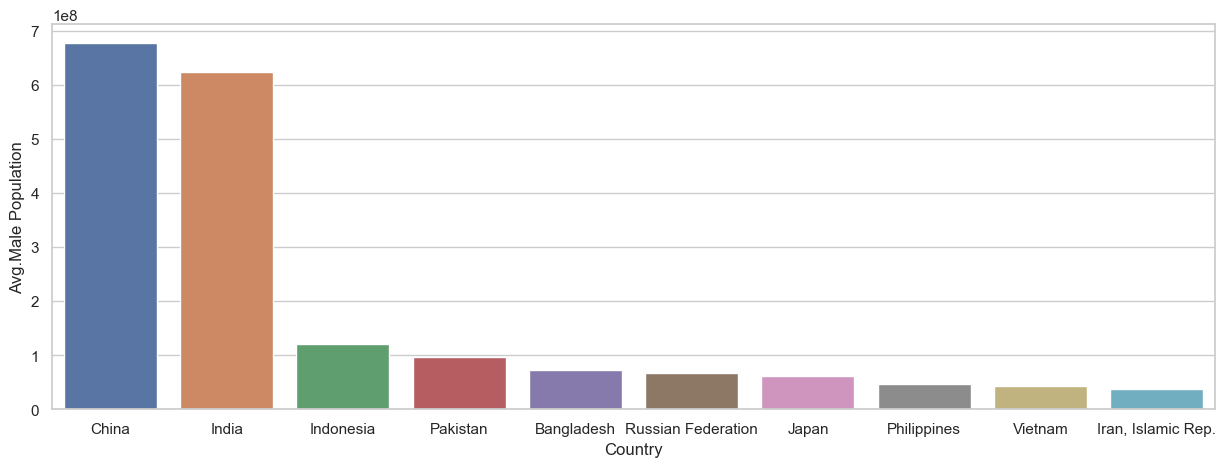

In [67]:
plt.figure(figsize=(15, 5))
sns.set_style("whitegrid")
ax = sns.barplot(data=avg_male_df.head(10), x="Country", y="Avg.Male Population")

In [68]:
# YOUR CODE HERE
avg_female_df = pd.DataFrame()

avg_female_df["Avg.Female Population"] = cleaned_df.groupby("Country")["Female Population"].mean()

avg_female_df["Country"] = avg_female_df.index
avg_female_df.reset_index(drop=True, inplace=True)
avg_female_df.sort_values("Avg.Female Population", inplace=True, ascending=False)

avg_female_df.head()

,Avg.Female Population,Country
8,6.477296e+08,China
11,5.832746e+08,India
12,1.186860e+08,Indonesia
31,9.084792e+07,Pakistan
34,7.758731e+07,Russian Federation


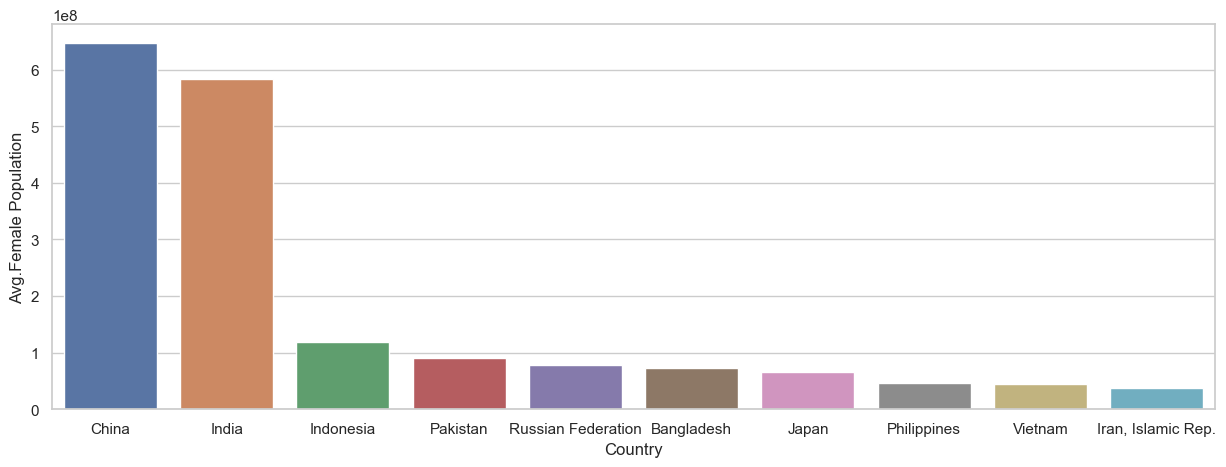

In [69]:
plt.figure(figsize=(15, 5))
sns.set_style("whitegrid")
ax = sns.barplot(data=avg_female_df.head(10), x="Country", y="Avg.Female Population")

In [70]:
population = pd.merge(avg_male_df, avg_female_df, on="Country")
population['ratio'] = population["Avg.Male Population"] / population["Avg.Female Population"]
population.sort_values("ratio", inplace=True, ascending=False)
population.head()

,Avg.Male Population,Country,Avg.Female Population,ratio
41,1.138511e+06,Qatar,4.192185e+05,2.715794
26,4.497530e+06,United Arab Emirates,1.884970e+06,2.385995
42,6.597690e+05,Bahrain,4.157492e+05,1.586940
36,1.950807e+06,Oman,1.252757e+06,1.557211
38,1.737740e+06,Kuwait,1.198237e+06,1.450247


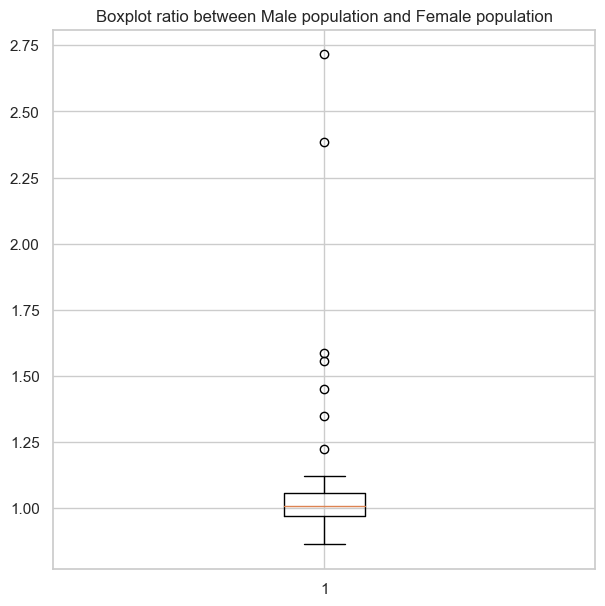

In [71]:
fig = plt.figure(figsize=(7, 7))
plt.title("Boxplot ratio between Male population and Female population")
plt.boxplot(x = population['ratio'])
plt.show()

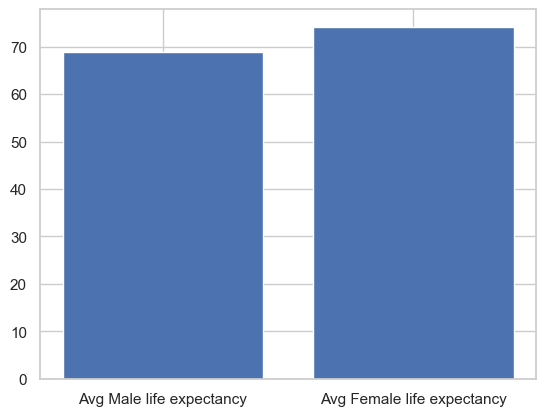

In [72]:
avg_male_life_expectancy = cleaned_df['Male life expectancy'].mean()
avg_female_life_expectancy = cleaned_df['Female life expectancy '].mean()
plt.bar(x = ["Avg Male life expectancy", "Avg Female life expectancy"], height=[avg_male_life_expectancy, avg_female_life_expectancy])
plt.show()

### Your conclusion

**Phân bố tỉ lệ nam/nữ:**
Hầu hết tỉ lệ nam/nữ ở các nước châu Á có xu hướng lớn hơn 1, có nước còn lên đến ~2.7. Điều này thể hiện dân số nam nhiều hơn nữ rất nhiều và điều này gây ra sự mất cân bằng giới tính cho các nước châu Á trong hiện tại.

**Tuổi thọ trung bình giữa nam và nữ:** Ta đã rút ra được kết luận dân số nam đang nhiều hơn dân số nữ, tuy nhiên tuổi thọ Nam lại ngắn hơn nữ nên ta có thể nói rằng các nước châu Á có thể có chuyển biến đáng kế để cân bằng giới tính.

## Making your own question 02 (2 points)

- Câu hỏi: Phân bổ việc làm trong ngành công nghiệp và nông nghiệp qua các năm thay đổi như thế nào?
- Trả lời câu hỏi này sẽ giúp chúng ta xác định xem sự phát triển của các ngành công nghiệp và nông nghiệp qua các năm.
- Để trả lời câu hỏi này: ta sẽ xem xét tỷ lệ việc làm trong ngành công nghiệp và nông nghiệp qua từng năm.

### Pre-processing

In [73]:
# YOUR CODE HERE (OPTION) 

### Analyzing to get the answer

In [74]:
# YOUR CODE HERE
# Create a new dataframe
avg_emp_industry = pd.DataFrame()

# YOUR CODE HERE
avg_emp_industry['Avg.Industry Ratio'] = cleaned_df.groupby("Year")["Employment in Industry(%)"].mean()
avg_emp_industry["Year"] = avg_emp_industry.index
avg_emp_industry.reset_index(drop=True, inplace=True)
avg_emp_industry.head()
# raise NotImplementedError()


,Avg.Industry Ratio,Year
0,20.153540,1995
1,19.975663,1996
2,19.903578,1997
3,19.536937,1998
4,19.451896,1999


In [75]:
avg_emp_agriculture = pd.DataFrame()

avg_emp_agriculture['Avg.Agriculture Ratio'] = cleaned_df.groupby("Year")['Employment in Agriculture(%)'].mean()
avg_emp_agriculture["Year"] = avg_emp_agriculture.index
avg_emp_agriculture.reset_index(drop=True, inplace=True)
avg_emp_agriculture.head()


,Avg.Agriculture Ratio,Year
0,35.769587,1995
1,35.330871,1996
2,34.932628,1997
3,34.903973,1998
4,34.742764,1999


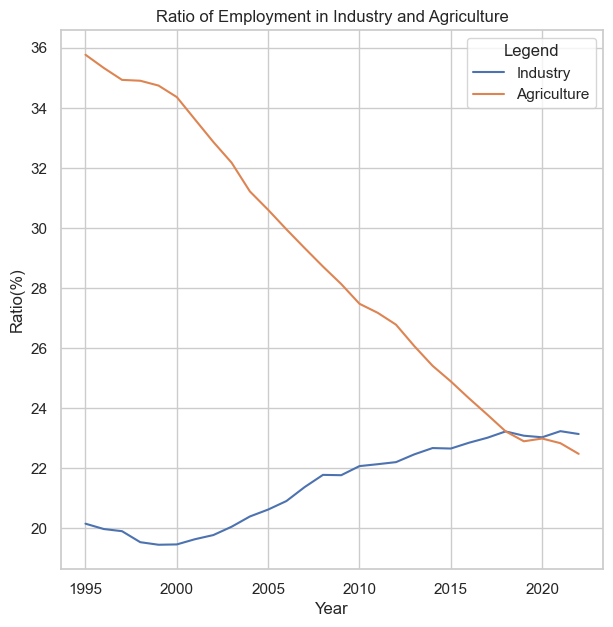

In [76]:
fig, ax = plt.subplots(figsize=(7, 7))
sns.set(style="whitegrid")
plt.title('Ratio of Employment in Industry and Agriculture')
plt.xlabel("Year")
plt.ylabel("Ratio(%)")
industry, = ax.plot(avg_emp_industry['Year'], avg_emp_industry['Avg.Industry Ratio'], '-')
agriculture, = ax.plot(avg_emp_agriculture['Year'], avg_emp_agriculture['Avg.Agriculture Ratio'], '-')

ax.legend([industry, agriculture], ['Industry', 'Agriculture'], title = "Legend")
plt.show()

### Your conclusion

- Tỉ lệ việc làm ngành Nông nghiệp có xu hướng giảm dần qua các năm.
- Tỉ lệ việc làm ngành Công nghiệp có xu hướng tăng qua các năm, tuy nhiên có giảm nhẹ ở giai đoạn các năm 2000.
- Tại năm 1995, tỉ lệ nông nghiệp rất cao so với công nghiệp. Song đến giai đoạn 2022, từ 2 xu hướng trên ta có thể thấy tỉ lệ công nghiệp đã vươn lên cao hơn. 

=> Xu hướng công nghiệp hóa, hiện đại hóa ảnh hưởng đến tỉ lệ phân bố việc làm các ngành, và trong tương lai, xu hướng việc làm ngành công nghiệp có thể tăng cao.